## Step 1: Preparations

### Importing libraries

In [1]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv("./data/hapiness_report_2022.csv", index_col=None)
df = df.sort_values("score").reset_index(drop=True)

In [3]:
font_family = "PT Mono"
background_color = "#F8F1F1"
text_color = "#040303"

sns.set_style({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "font.family": font_family,
    "text.color": text_color,
})

In [16]:
START_ANGLE = 100 # At what angle to start drawing the first wedge
END_ANGLE = 450 # At what angle to finish drawing the last wedge
SIZE = (END_ANGLE - START_ANGLE) / len(df) # The size of each wedge
PAD = 0.2 * SIZE # The padding between wedges

INNER_PADDING = 2 * df.score.min() # 
LIMIT = (INNER_PADDING + df.score.max()) * 1.3 # Limit of the axes

In [5]:
def draw_wedge(ax, start, end, length, width, color):
    ax.add_artist(Wedge((0, 0), length, start, end, color=color, width=width))

In [6]:
def color(income_group=""):
    if income_group == "High income":
        return "#468FA8"
    elif income_group == "Lower middle income":
        return "#E5625E"
    elif income_group == "Upper middle income":
        return "#62466B"
    elif income_group == "Low income":
        return "#6B0F1A"
    else:
        return "#909090"
#     return "#000"

In [7]:
def add_text(ax, x, y, country, score, angle):
    if angle < 270:
        text = "{} ({})".format(country, score)
        ax.text(x, y, text, fontsize=13, rotation=angle-180, ha="right", va="center", rotation_mode="anchor")
    else:
        text = "({}) {}".format(score, country)
        ax.text(x, y, text, fontsize=13, rotation=angle, ha="left", va="center", rotation_mode="anchor")

In [8]:
def add_flag(ax, x, y, name, zoom, rotation):
    flag = Image.open("../../data/country-flags/png/{}.png".format(name.lower()))
    flag = flag.rotate(rotation if rotation > 270 else rotation - 180)
    im = OffsetImage(flag, zoom=zoom, interpolation="lanczos", resample=True, visible=True)

    ax.add_artist(AnnotationBbox(
        im, (x, y), frameon=False,
        xycoords="data",
    ))

In [9]:
def add_legend(labels, colors, title):
    lines = [Line2D([], [], marker='o', markersize=24, linewidth=0, color=c) for c in colors]

    plt.legend(
        lines, labels,
        fontsize=18, loc="upper left", alignment="left", borderpad=1.3, edgecolor="#E4C9C9", labelspacing=1,
        facecolor="#F1E4E4", framealpha=1, borderaxespad=1,
        title=title,
        title_fontsize=20,
    )

In [22]:
def draw_reference_line(ax, point, size, padding, fontsize=18):
    draw_wedge(ax, 0, 360, point+padding+size/2, size, background_color)
    ax.text(-0.7, padding + point, point, va="center", rotation=1, fontsize=fontsize)

In [11]:
def get_xy_with_padding(length, angle, padding):
    x = math.cos(math.radians(angle)) * (length + padding)
    y = math.sin(math.radians(angle)) * (length + padding)
    return x, y

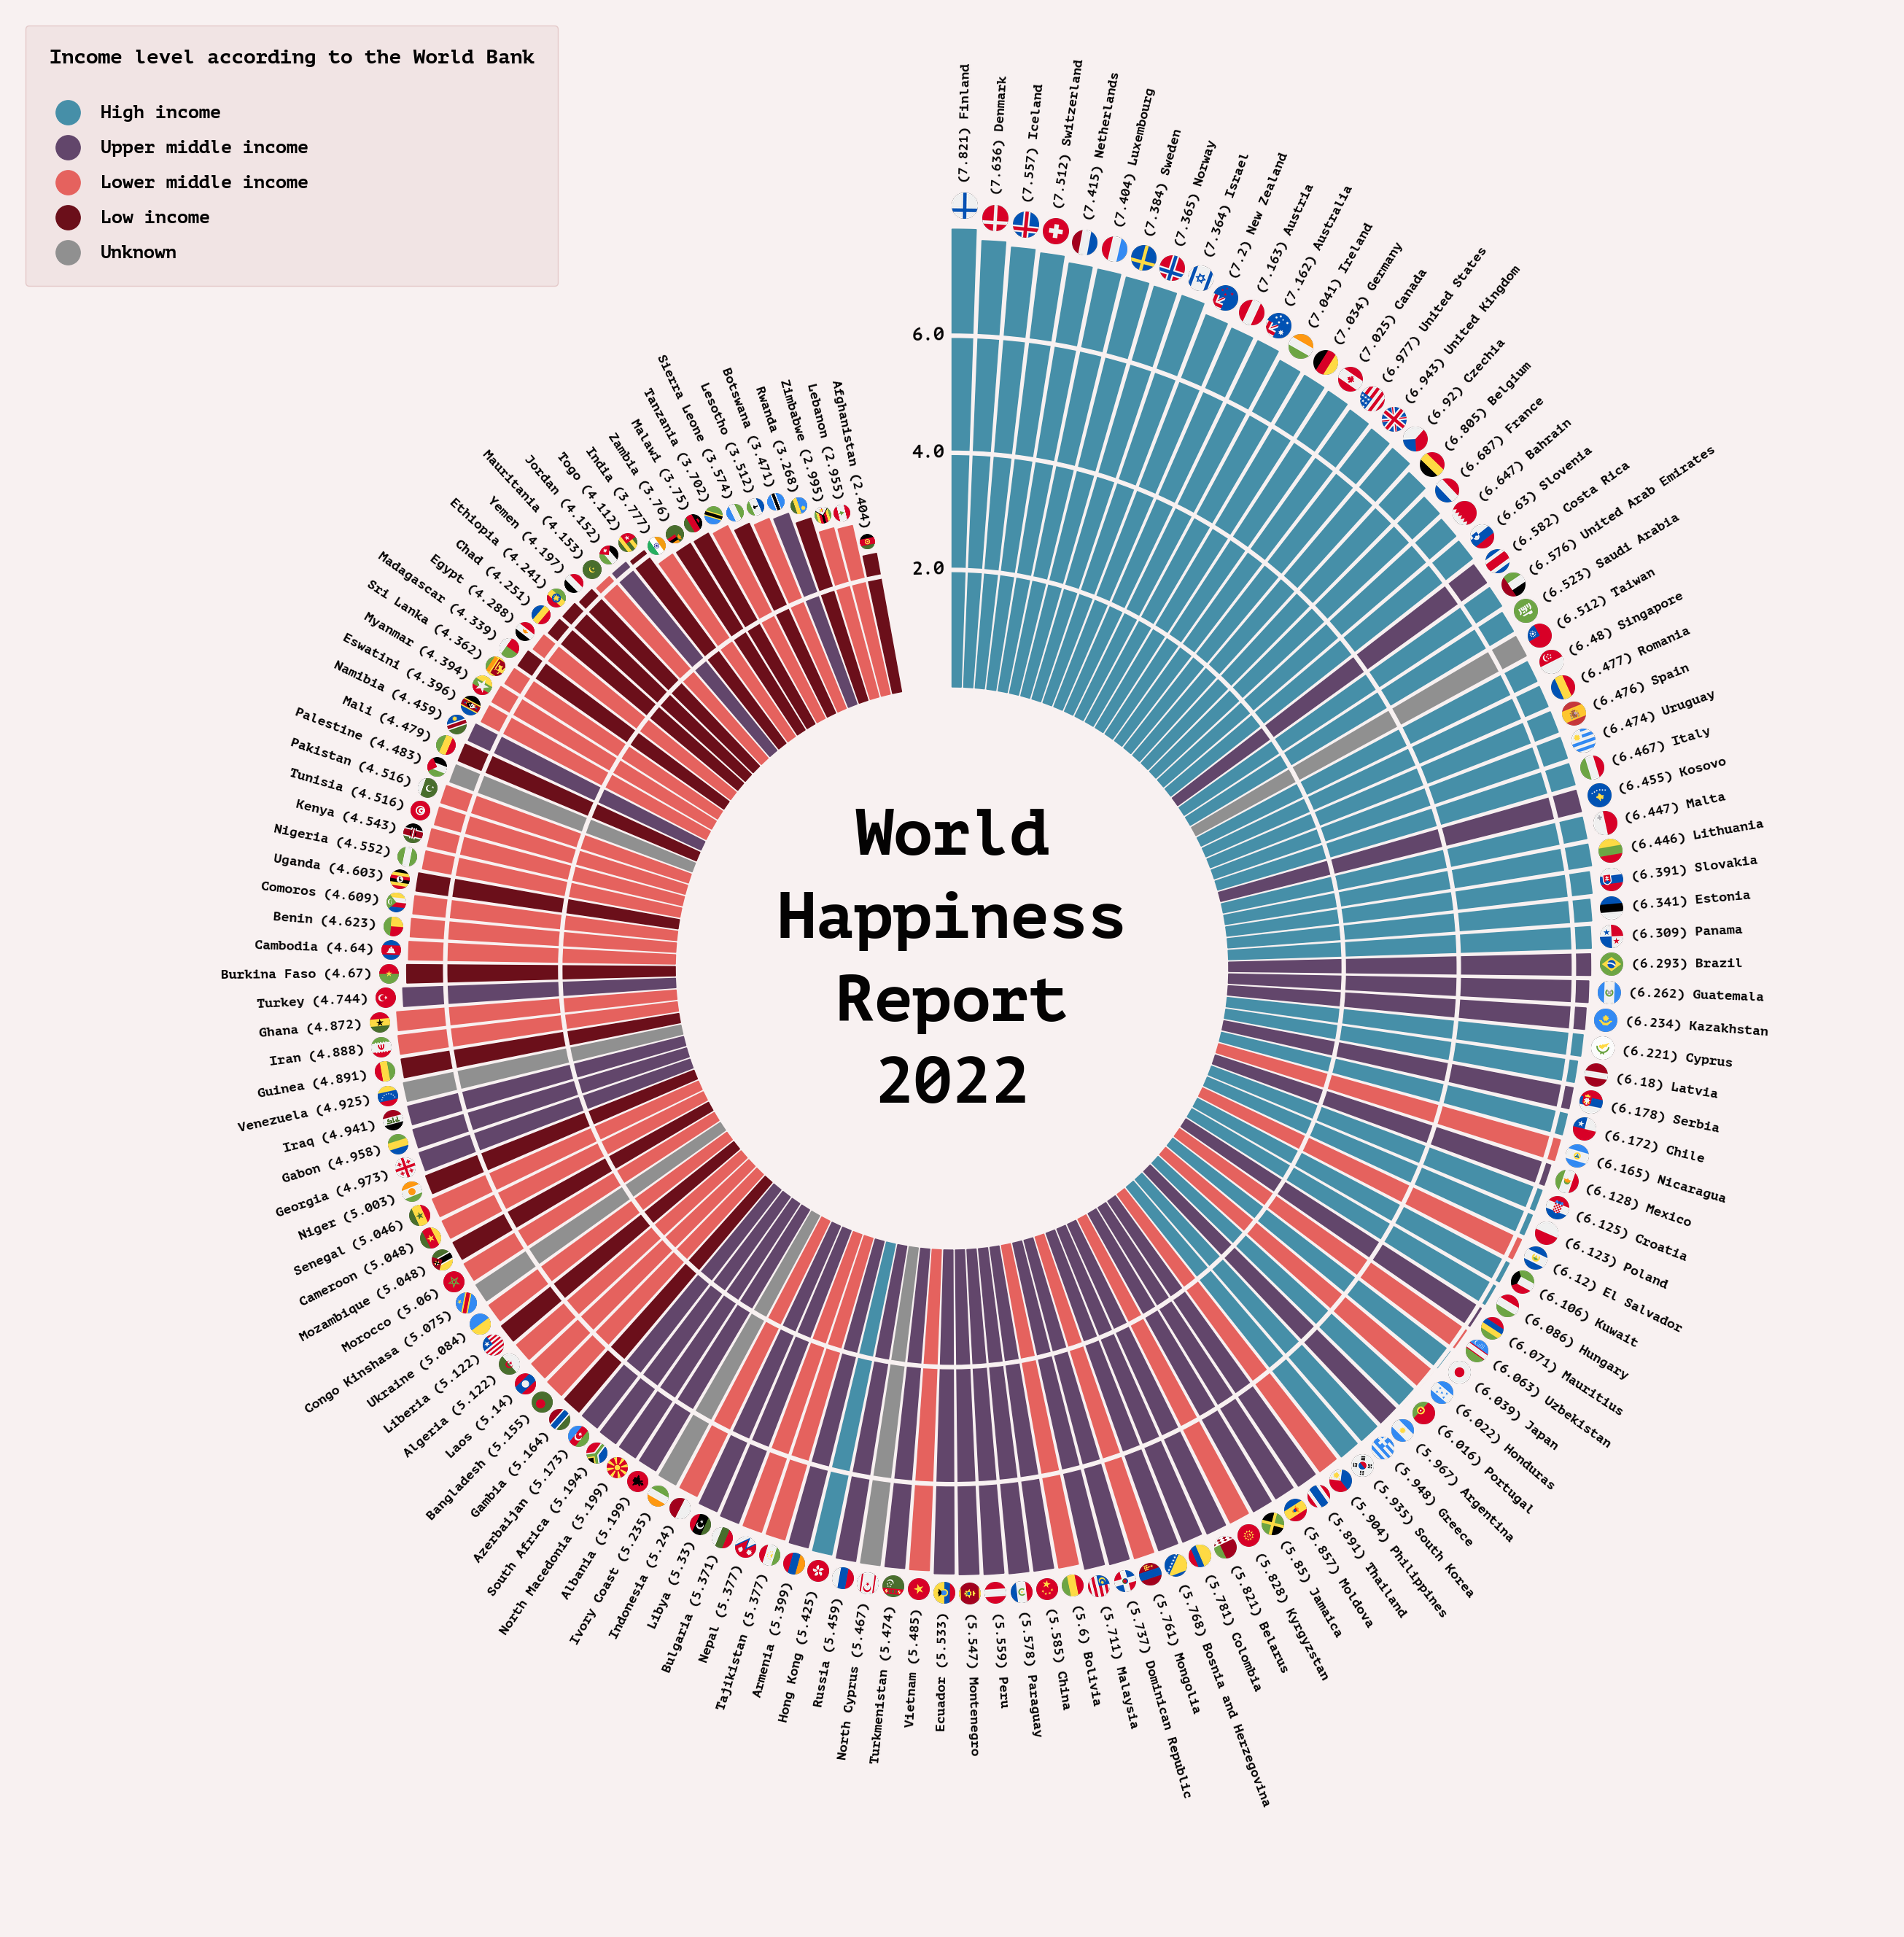

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax.set(xlim=(-LIMIT, LIMIT), ylim=(-LIMIT, LIMIT))

for i, row in df.iterrows():
    bar_length = row.score
    length = bar_length + INNER_PADDING
    start = START_ANGLE + i*SIZE + PAD
    end = START_ANGLE + (i+1)*SIZE
    angle = (end + start) / 2
    
    # Add variables here
    flag_zoom = 0.004 * length
    flag_x, flag_y = get_xy_with_padding(length, angle, 8*flag_zoom)
    text_x, text_y = get_xy_with_padding(length, angle, 16*flag_zoom)
    
    # Add functions here
    draw_wedge(ax, start, end, length, bar_length, color(row.income))
    add_flag(ax, flag_x, flag_y, row.country, flag_zoom, angle)
    add_text(ax, text_x, text_y, row.country, bar_length, angle)

ax.text(1-LIMIT, LIMIT-2, "+ main title", fontsize=58)

# Add general functions here
draw_reference_line(ax, 2.0, 0.06, INNER_PADDING)
draw_reference_line(ax, 4.0, 0.06, INNER_PADDING)
draw_reference_line(ax, 6.0, 0.06, INNER_PADDING)
plt.title("World Happiness Report 2022".replace(" ", "\n"), x=0.5, y=0.5, va="center", ha="center", fontsize=64, linespacing=1.5)

add_legend(
    labels=["High income", "Upper middle income", "Lower middle income", "Low income", "Unknown"],
    colors=["#468FA8", "#62466B", "#E5625E", "#6B0F1A", "#909090"],
    title="Income level according to the World Bank\n"
)

plt.axis("off")
plt.tight_layout()
plt.show()